## Assignment 3 Pattern Mining and Recommender Systems: Individual Code

### Task 1: Pattern mining

### Ky Cuong Pham, 1906313, Version 01

# 0. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("data/Groceries data train.csv")
data = data.dropna()

# Convert columns to appropriate types
data['User_id'] = data['User_id'].astype('int')
data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['day'] = data['day'].astype('int')
data['day_of_week'] = data['day_of_week'].astype('int')


# plot the frequency of items pairs


In [307]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19382 entries, 0 to 19381
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_id          19382 non-null  int64 
 1   Date             19382 non-null  object
 2   itemDescription  19382 non-null  object
 3   year             19382 non-null  int64 
 4   month            19382 non-null  int64 
 5   day              19382 non-null  int64 
 6   day_of_week      19382 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ MB


,User_id,year,month,day,day_of_week
count,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,3009.050769,2014.057012,6.166134,15.391342,3.023785
std,1158.135945,0.231871,3.572992,8.750628,1.994446
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,1998.000000,2014.000000,3.000000,8.000000,1.000000
50%,3015.500000,2014.000000,6.000000,15.000000,3.000000
75%,4025.000000,2014.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [308]:
print(data['User_id'].nunique(), "unique users")
print(data['itemDescription'].nunique(), "unique items")
print(data.shape[0], "total transactions")

3493 unique users
167 unique items
19382 total transactions


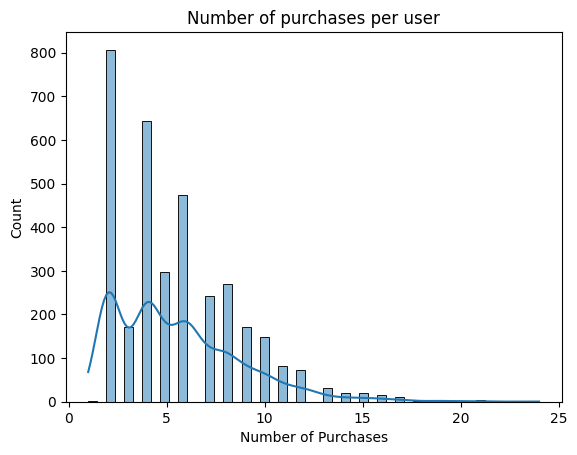

In [309]:
# Purchases per user
user_counts = data['User_id'].value_counts()
sns.histplot(user_counts, bins=50, kde=True)
plt.title("Number of purchases per user")
plt.xlabel("Number of Purchases")
plt.show()

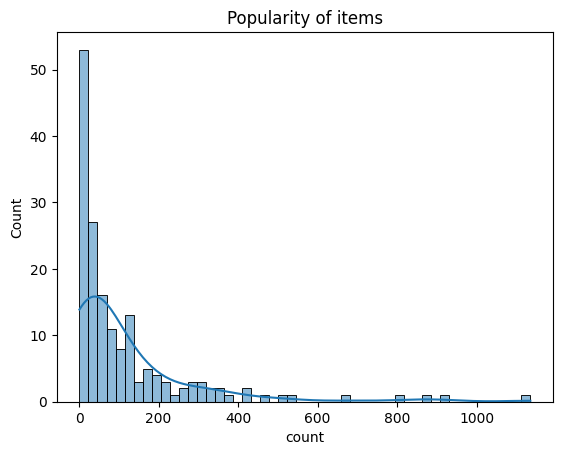

In [310]:
# Purchases per item
item_counts = data['itemDescription'].value_counts()
sns.histplot(item_counts, bins=50, kde=True)
plt.title("Popularity of items")
plt.show()

In [311]:
item_counts

itemDescription
whole milk               1135
other vegetables          916
rolls/buns                878
soda                      816
yogurt                    678
                         ... 
frozen chicken              2
bags                        1
preservation products       1
kitchen utensil             1
baby cosmetics              1
Name: count, Length: 167, dtype: int64

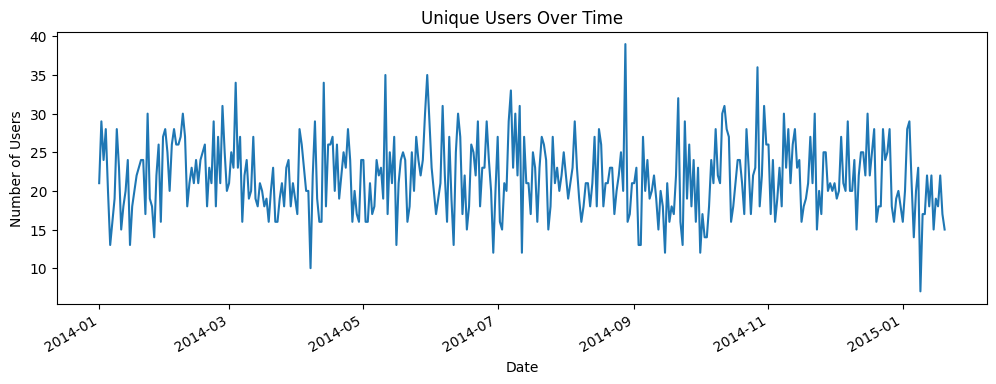

In [312]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
user_time_trend = data.groupby(['date'])['User_id'].nunique()

user_time_trend.plot(figsize=(12,4))
plt.title("Unique Users Over Time")
plt.ylabel("Number of Users")
plt.xlabel("Date")
plt.show()

# 1. Data preprocessing

In [313]:

# split the data into train and test sets
from sklearn.model_selection import train_test_split

data['purchase'] = 1  # implicit feedback

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (15505, 9)
Test data shape: (3877, 9)


# 2. Memory based approach

In [314]:
user_item_matrix = train_data.groupby(['User_id', 'itemDescription']).size().unstack(fill_value=0)
user_item_matrix.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
User_id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [315]:
from sklearn.metrics.pairwise import cosine_similarity

 # Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix) #user and user
# Create user similarity DataFrame
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

user_similarity_df.head()

User_id,1000,1001,1002,1003,1004,1005,1006,1009,1010,1011,...,4988,4989,4990,4991,4992,4993,4995,4997,4999,5000
User_id,,,,,,,,,,,,,,,,,,,,,
1000,1.000000,0.000000,0.000000,0.000000,0.147442,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1001,0.000000,1.000000,0.188982,0.169031,0.315244,0.218218,0.308607,0.0,0.000000,0.188982,...,0.000000,0.267261,0.0,0.104828,0.000000,0.169031,0.0,0.000000,0.000000,0.000000
1002,0.000000,0.188982,1.000000,0.000000,0.312772,0.000000,0.204124,0.0,0.000000,0.000000,...,0.288675,0.353553,0.0,0.416025,0.000000,0.000000,0.0,0.000000,0.250000,0.250000
1003,0.000000,0.169031,0.000000,1.000000,0.279751,0.258199,0.182574,0.0,0.000000,0.223607,...,0.000000,0.316228,0.0,0.248069,0.000000,0.400000,0.0,0.000000,0.223607,0.000000
1004,0.147442,0.315244,0.312772,0.279751,1.000000,0.240772,0.340503,0.0,0.065938,0.208514,...,0.000000,0.294884,0.0,0.346989,0.085126,0.186501,0.0,0.208514,0.104257,0.104257


In [316]:
user_id = 1145
n_neighbors = 10  
top_n = 5

# Get similar users (excluding the target user)
user_idx = user_item_matrix.index.get_loc(user_id)
similar_users = user_similarity_df.iloc[user_idx].sort_values(ascending=False)[1:n_neighbors+1]
print(f"Top {n_neighbors} similar users to User {user_id}:")
for sim_user_id, similarity in similar_users.items():
    print(f"User {sim_user_id}: Similarity = {similarity:.3f}")

Top 10 similar users to User 1145:
User 1405: Similarity = 0.816
User 1523: Similarity = 0.775
User 4539: Similarity = 0.667
User 2005: Similarity = 0.667
User 3626: Similarity = 0.667
User 2266: Similarity = 0.667
User 3851: Similarity = 0.667
User 4943: Similarity = 0.667
User 1969: Similarity = 0.655
User 2204: Similarity = 0.655


In [317]:
# Get items that the target user hasn't purchased
user_items = set(user_item_matrix.columns[user_item_matrix.loc[user_id] > 0])
items_to_recommend = set(user_item_matrix.columns) - user_items
print(f"Items not purchased by User {user_id}:  {items_to_recommend}")

Items not purchased by User 1145:  {'zwieback', 'bags', 'beef', 'hamburger meat', 'soft cheese', 'specialty cheese', 'turkey', 'cream cheese ', 'abrasive cleaner', 'mayonnaise', 'flour', 'frozen vegetables', 'artif. sweetener', 'preservation products', 'cat food', 'specialty vegetables', 'dog food', 'baby cosmetics', 'sauces', 'candles', 'cleaner', 'detergent', 'liquor', 'domestic eggs', 'rice', 'citrus fruit', 'bottled water', 'soda', 'spread cheese', 'yogurt', 'cling film/bags', 'ready soups', 'cereals', 'root vegetables', 'UHT-milk', 'grapes', 'rolls/buns', 'meat', 'beverages', 'kitchen towels', 'sugar', 'canned fruit', 'white bread', 'pasta', 'margarine', 'popcorn', 'frozen fish', 'hygiene articles', 'tidbits', 'frankfurter', 'honey', 'sausage', 'chocolate', 'decalcifier', 'white wine', 'potato products', 'semi-finished bread', 'condensed milk', 'napkins', 'nut snack', 'liver loaf', 'pot plants', 'cream', 'frozen meals', 'salt', 'misc. beverages', 'flower (seeds)', 'salty snack', '

In [318]:
# Calculate recommendation scores
recommendations = {}

for item in items_to_recommend:
    score = 0
    total_similarity = 0
    
    for sim_user_id, similarity in similar_users.items():
        # If similar user has purchased this item
        if user_item_matrix.loc[sim_user_id, item] > 0:
            weight = user_item_matrix.loc[sim_user_id, item]
            score += similarity * weight
            total_similarity += similarity
    
    # Normalize score by total similarity if possible
    if total_similarity > 0:
        recommendations[item] = score / total_similarity # sum(similarity * rating)/sum(similarity)

# Sort recommendations by score
sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

# Return top N recommendations
sorted_recommendations[:top_n]

[('cat food', 1.0),
 ('domestic eggs', 1.0),
 ('popcorn', 1.0),
 ('chocolate', 1.0),
 ('white wine', 1.0)]

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


# Build user-item interaction matrix from training data
user_item_matrix = train_data.groupby(['User_id', 'itemDescription'])['purchase'].sum().unstack(fill_value=0)

# Cosine similarity (user-user)
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Evaluate on test set
actuals = []
predictions = []
n_neighbors = 10

for _, row in train_data.iterrows():
    user = row['User_id']
    item = row['itemDescription']
    
    # Only evaluate if user and item are in training data
    if user in user_item_matrix.index and item in user_item_matrix.columns:
        user_idx = user_item_matrix.index.get_loc(user)
        similar_users = user_similarity_df.iloc[user_idx].sort_values(ascending=False)[1:n_neighbors+1]
        
        score = 0
        total_sim = 0
        for sim_user_id, similarity in similar_users.items():
            if item in user_item_matrix.columns:
                interaction = user_item_matrix.loc[sim_user_id, item]
                if interaction > 0:
                    score += similarity * interaction
                    total_sim += similarity
        
        predicted = score / total_sim if total_sim > 0 else 0
        predictions.append(predicted)
        actuals.append(1)  # because every row in test_df is an actual purchase

# Compute RMSE
manual_rmse = np.sqrt(mean_squared_error(actuals, predictions))


# 3. Model based approach

## SVD

In [320]:
from surprise import Dataset, Reader, SVD, accuracy

# Reader
reader = Reader(rating_scale=(0, 1))

# Prepare trainset
train_data_surprise = Dataset.load_from_df(train_data[['User_id', 'itemDescription', 'purchase']], reader)
trainset = train_data_surprise.build_full_trainset()

# Prepare testset: list of (user, item, rating) tuples
testset = list(test_data[['User_id', 'itemDescription', 'purchase']].itertuples(index=False, name=None))

# Train SVD
svd = SVD()
svd.fit(trainset)

# Predict on testset
predictions = svd.test(testset)

# Evaluate
svd_rmse = accuracy.rmse(predictions)
print(f"RMSE of SVD model: {svd_rmse:.4f}")

# Calculate recommendation scores
recommendations = {}
for item in items_to_recommend:
    # Predict if the user will buy the item
    pred = svd.predict(user_id, item)
    recommendations[item] = pred.est

# Sort recommendations by the predicted score
sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

# Show the top N recommendations
print(f"Top {top_n} recommendations for User {user_id}:")
for item, score in sorted_recommendations[:top_n]:
    print(f"{item}: Predicted score = {score:.4f}")



RMSE: 0.0420
RMSE of SVD model: 0.0420
Top 5 recommendations for User 1145:
zwieback: Predicted score = 1.0000
bags: Predicted score = 1.0000
beef: Predicted score = 1.0000
specialty cheese: Predicted score = 1.0000
turkey: Predicted score = 1.0000


## MLP

In [321]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Fit on the full dataset to ensure consistent mapping
data['user'] = user_encoder.fit_transform(data['User_id'])
data['item'] = item_encoder.fit_transform(data['itemDescription'])

train_data['user'] = user_encoder.transform(train_data['User_id'])
train_data['item'] = item_encoder.transform(train_data['itemDescription'])

test_data['user'] = user_encoder.transform(test_data['User_id'])
test_data['item'] = item_encoder.transform(test_data['itemDescription'])

In [322]:
train_interactions = list(zip(train_data['user'], train_data['item'], train_data['purchase']))
test_interactions = list(zip(test_data['user'], test_data['item'], test_data['purchase']))

num_users = data['user'].nunique()
num_items = data['item'].nunique()

In [323]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import random
from tqdm import tqdm

class MLPDataset(Dataset):
    def __init__(self, interactions, num_users, num_items, num_negatives=4, is_training=True):
        self.data = []
        self.num_users = num_users
        self.num_items = num_items
        self.interactions_set = set((u, i) for u, i, l in interactions if l == 1)
        
        if is_training:
            for (u, i, label) in interactions:
                self.data.append((u, i, label))
                if label == 1:
                    for _ in range(num_negatives):
                        j = random.randint(0, num_items - 1)
                        while (u, j) in self.interactions_set:
                            j = random.randint(0, num_items - 1)
                        self.data.append((u, j, 0))
        else:
            self.data = interactions

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        user, item, label = self.data[idx]
        return torch.tensor(user), torch.tensor(item), torch.tensor(label, dtype=torch.float32)

class MLPRec(nn.Module):
    def __init__(self, num_users, num_items, layers=[64,32,16,8]):
        super(MLPRec, self).__init__()
        self.embedding_user = nn.Embedding(num_users, layers[0] // 2)
        self.embedding_item = nn.Embedding(num_items, layers[0] // 2)
        
        mlp_layers = []
        input_size = layers[0]
        for layer_size in layers[1:]:
            mlp_layers.append(nn.Linear(input_size, layer_size))
            mlp_layers.append(nn.ReLU())
            input_size = layer_size
            
        self.mlp = nn.Sequential(*mlp_layers)
        self.output = nn.Linear(layers[-1], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user, item):
        user_emb = self.embedding_user(user)
        item_emb = self.embedding_item(item)
        x = torch.cat([user_emb, item_emb], dim=-1)
        x = self.mlp(x)
        x = self.output(x)
        return self.sigmoid(x).squeeze()


100%|██████████| 100/100 [14:46<00:00,  8.87s/it]


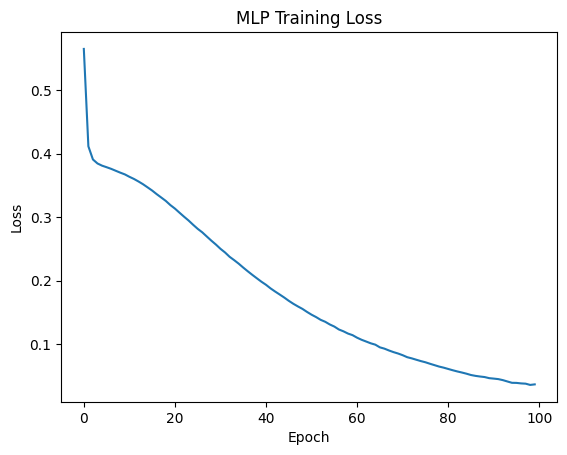

In [324]:

train_dataset = MLPDataset(train_interactions, num_users, num_items, num_negatives=4, is_training=True)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

model = MLPRec(num_users, num_items)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

epochs = 100

history = []
for epoch in tqdm(range(epochs)):
    model.train()
    total_loss = 0
    for user, item, label in train_loader:
        optimizer.zero_grad()
        output = model(user, item)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    history.append(avg_loss)

#plot the training loss
plt.plot(history)
plt.title("MLP Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [325]:
from sklearn.metrics import mean_squared_error
import numpy as np

model.eval()
true_labels = []
pred_scores = []

with torch.no_grad():
    for (u, i, l) in test_interactions: # user, item, label
        user_tensor = torch.tensor([u])
        item_tensor = torch.tensor([i])
        pred = model(user_tensor, item_tensor).item()
        pred_scores.append(pred)
        true_labels.append(l)

mlp_rmse = np.sqrt(mean_squared_error(true_labels, pred_scores))
print(f"Test RMSE: {mlp_rmse:.4f}")


Test RMSE: 0.7575


In [326]:
def get_ranked_items_for_user(user_id: int, model, num_items: int, item_encoder, user_encoder, top_n=None):
    """
    Given an original user ID (int), this function maps the user to the encoded user ID, 
    predicts item recommendations, and returns the ranked items.

    Args:
        user_id (int): The original user ID.
        model (torch.nn.Module): Trained recommendation model.
        num_items (int): Total number of unique items.
        item_encoder (LabelEncoder): Encoder for item descriptions.
        user_encoder (LabelEncoder): Encoder for user IDs.
        top_n (int or None): If set, only return top N items.

    Returns:
        List of tuples (decoded_user_id, decoded_item_id, decoded_item_description, score),
        sorted by descending score.
    """
    model.eval()

    # Remap the original user ID to the encoded user ID
    encoded_user_id = user_encoder.transform([user_id])[0]
    
    # Generate recommendations for this user
    item_tensor = torch.arange(num_items)
    user_tensor = torch.full_like(item_tensor, fill_value=encoded_user_id)

    with torch.no_grad():
        scores = model(user_tensor, item_tensor).numpy()

    ranked = sorted(zip(item_tensor.numpy(), scores), key=lambda x: x[1], reverse=True)

    # Decode item IDs back to original item descriptions
    decoded_ranked = []
    for item_id, score in ranked:
        decoded_item_id = item_encoder.inverse_transform([item_id])[0]  # Decode item ID to original description
        decoded_item_description = decoded_item_id  # Assuming item ID corresponds to itemDescription directly
        decoded_ranked.append((user_id, decoded_item_id, decoded_item_description, score))

    return decoded_ranked[:top_n] if top_n else decoded_ranked


In [327]:
ranked_items = get_ranked_items_for_user(user_id, model, num_items, item_encoder, user_encoder, top_n=5)

print(f"Top 5 recommendations for User ID {user_id}:")
for decoded_user_id, item_id, item_description, score in ranked_items:
    print(f"User: {decoded_user_id} | Item: {item_description} (ID: {item_id}) - score = {score:.4f}")


Top 5 recommendations for User ID 1145:
User: 1145 | Item: dessert (ID: dessert) - score = 1.0000
User: 1145 | Item: sausage (ID: sausage) - score = 1.0000
User: 1145 | Item: pastry (ID: pastry) - score = 1.0000
User: 1145 | Item: flour (ID: flour) - score = 1.0000
User: 1145 | Item: cream cheese  (ID: cream cheese ) - score = 1.0000


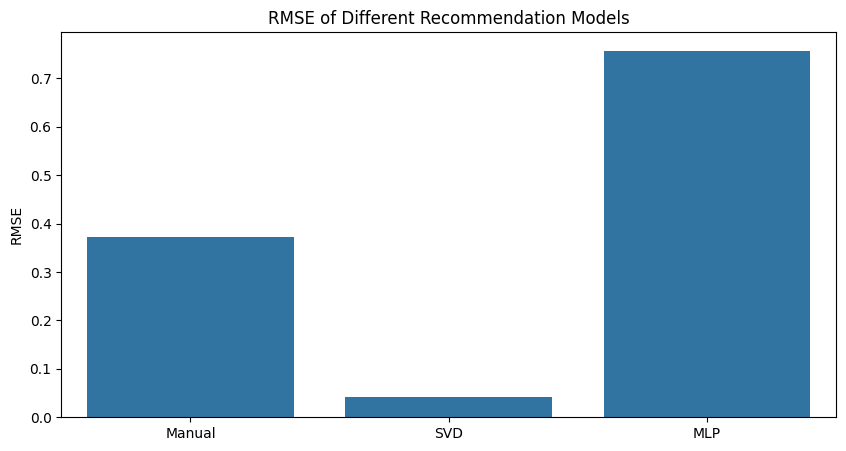

In [328]:
#Plot the final RMSE of manual_rmse, svd_rmse and mlp_rmse
rmse_values = [manual_rmse, svd_rmse, mlp_rmse]
rmse_labels = ['Manual', 'SVD', 'MLP']
plt.figure(figsize=(10, 5))
sns.barplot(x=rmse_labels, y=rmse_values)
plt.ylabel('RMSE')
plt.title('RMSE of Different Recommendation Models')
plt.show()

# 5. Final module

In [330]:
from surprise import Dataset, Reader, SVD, accuracy
#SVD 
class CFRecommender:
    def __init__(self, data_path):
        self.data_path = data_path
        self.svd = SVD()
        
        self.train()
        
    def load_df(self):
        df = pd.read_csv(self.data_path)
        df = df.dropna()
        df['User_id'] = df['User_id'].astype('int')
        df['year'] = df['year'].astype('int')
        df['month'] = df['month'].astype('int')
        df['day'] = df['day'].astype('int')
        
        self.df = df
        
    def preprocess_df(self):
        # Implicit feedback
        self.df['purchase'] = 1
        
        # Split into train and test sets 80/20
        train_df, test_df = train_test_split(self.df, test_size=0.2, random_state=42)
        self.train_df = train_df
        self.test_df = test_df
        
        # Prepare data for SVD
        reader = Reader(rating_scale=(0, 1))
        train_data_surprise = Dataset.load_from_df(train_data[['User_id', 'itemDescription', 'purchase']], reader)
        self.trainset = train_data_surprise.build_full_trainset()
        self.testset = list(test_data[['User_id', 'itemDescription', 'purchase']].itertuples(index=False, name=None))
        
    def train(self):
        self.load_df()
        self.preprocess_df()
        
        self.svd.fit(self.trainset)
        
    def handle_cold_start(self, top_n=5): # New user
        # Return most frequently bought items
        popular_items = self.train_df['itemDescription'].value_counts().index[:top_n]
        return [(item, 0.0) for item in popular_items]
        
    def evaluate(self):
        return accuracy.rmse(self.svd.test(self.testset))
    
    def recommend(self, user_id, use_patterns=False, top_n=5):
        if user_id not in self.train_df['User_id'].unique():
            print(f"Cold start for User ID {user_id}")
            return self.handle_cold_start(top_n)

        user_items = set(self.train_df[self.train_df['User_id'] == user_id]['itemDescription'])
        all_items = set(self.train_df['itemDescription'].unique())
        items_to_recommend = all_items - user_items

        # Collaborative Filtering Predictions
        recommendations = {}
        for item in items_to_recommend:
            try:
                pred = self.svd.predict(user_id, item)
                recommendations[item] = pred.est
            except:
                continue

        sorted_cf_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

        if not use_patterns:
            return sorted_cf_recs[:top_n]

        # MOCKED frequent-pattern fallback (replace with your actual pattern engine)
        pattern_based = self.mock_pattern_based(user_items)
        for item, score in pattern_based:
            if item not in user_items and item not in recommendations:
                recommendations[item] = score

        final_sorted = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
        return final_sorted[:top_n]

    def mock_pattern_based(self, user_items):
        # Simulated rules: if user buys 'sugar' → recommend 'milk'
        rules = {
            'sugar': [('milk', 0.7)],
            'flour': [('eggs', 0.6)],
            'ketchup': [('mayonnaise', 0.5)],
        }
        recs = []
        for item in user_items:
            if item in rules:
                recs.extend(rules[item])
        return recs

recommender = CFRecommender("data/Groceries data train.csv")

while True:
    user_input = input("\nEnter User ID (or 'exit'): ").strip()
    if user_input.lower() == 'exit':
        break
    if not user_input.isdigit():
        print("Invalid User ID.")
        continue

    user_id = int(user_input)

    pattern_input = input("Use frequent patterns? (yes/no): ").strip().lower()
    use_patterns = pattern_input == 'yes'

    recommendations = recommender.recommend(user_id, use_patterns, top_n=5)
    print("======================================================")
    print(f"Top 5 recommendations for User ID {user_id} ({'with' if use_patterns else 'without'} patterns):")
    for item, score in recommendations:
        print(f"{item}: Score = {score:.4f}")          

Top 5 recommendations for User ID 1435 (with patterns):
hamburger meat: Score = 1.0000
mayonnaise: Score = 1.0000
artif. sweetener: Score = 1.0000
specialty vegetables: Score = 1.0000
preservation products: Score = 1.0000
